In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
def plot_image(img):
    plt.figure(figsize = (8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
def plot_result(df, title):
    data = np.transpose(np.array(df[['ACC', 'F1', 'AUC']]))
    xvalues = df['ModeloBase'].tolist()
    X = np.arange(15)
    fig = plt.figure(figsize = (9, 2))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label = 'ACC')
    ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label = 'F1')
    ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label = 'AUC')
    plt.xticks(X + 0.25, xvalues)
    plt.xticks(rotation=90)
    plt.legend(loc = 'best')
    plt.title(title, size = 18)
    plt.ylabel('Métricas de\navaliação', size = 18)
    plt.ylim([0, 1.05])
    plt.show()

# Define a lista de modelos

In [3]:
lista_modelos = ['DenseNet121', 'DenseNet169', 'DenseNet201', 'InceptionV3', 'MobileNetV2', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'VGG16', 'VGG19', 'Xception']

# Carrega as métricas de treinamento e teste dos modelos com dataset METU

Métricas de treinamento dos modelos com o dataset METU:


,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoTreinamento
0,MobileNetV2,0.624,3121,5,3,3271,0.998750,0.998474,0.999084,0.998779,0.999993,0.001250,828.335934
1,DenseNet121,0.631,3118,8,2,3272,0.998437,0.997561,0.999389,0.998474,0.999983,0.001563,1719.220258
2,DenseNet169,0.326,3117,9,3,3271,0.998125,0.997256,0.999084,0.998169,0.999983,0.001875,2768.462361
3,DenseNet201,0.590,3121,5,4,3270,0.998594,0.998473,0.998778,0.998626,0.999979,0.001406,2166.732665
4,ResNet50V2,0.823,3126,0,10,3264,0.998437,1.000000,0.996946,0.998470,0.999965,0.001563,1436.454577
5,ResNet101V2,0.746,3120,6,12,3262,0.997188,0.998164,0.996335,0.997249,0.999957,0.002812,4853.587863
6,VGG16,0.478,3120,6,4,3270,0.998437,0.998168,0.998778,0.998473,0.999932,0.001563,1997.379921
7,VGG19,0.732,3123,3,6,3268,0.998594,0.999083,0.998167,0.998625,0.999922,0.001406,2218.168367
8,Zero,0.265,3108,18,7,3267,0.996094,0.994521,0.997862,0.996188,0.999814,0.003906,1194.642946
9,Xception,0.656,3117,9,15,3259,0.996250,0.997246,0.995418,0.996331,0.999780,0.003750,1190.087320


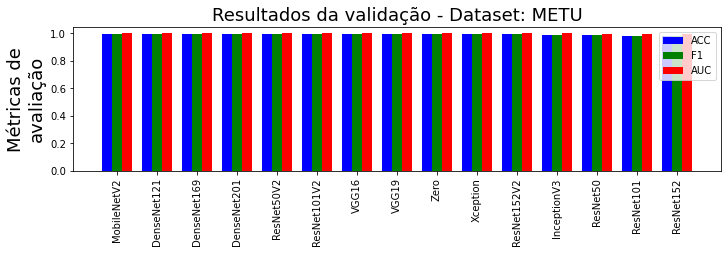

Métricas de teste dos modelos com o dataset METU:


,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
0,DenseNet121,0.631,3989,11,6,3994,0.997875,0.997253,0.99850,0.997876,0.999945,0.002125,53.227346
1,VGG16,0.478,3983,17,1,3999,0.997750,0.995767,0.99975,0.997754,0.999935,0.002250,21.790396
2,VGG19,0.732,3986,14,5,3995,0.997625,0.996508,0.99875,0.997628,0.999909,0.002375,24.650114
3,Zero,0.265,3969,31,7,3993,0.995250,0.992296,0.99825,0.995264,0.999894,0.004750,4.993570
4,DenseNet201,0.590,3989,11,2,3998,0.998375,0.997256,0.99950,0.998377,0.999821,0.001625,84.663156
5,DenseNet169,0.326,3980,20,1,3999,0.997375,0.995024,0.99975,0.997381,0.999816,0.002625,71.178384
6,ResNet152V2,0.262,3979,21,11,3989,0.996000,0.994763,0.99725,0.996005,0.999783,0.004000,47.316458
7,MobileNetV2,0.624,3990,10,5,3995,0.998125,0.997503,0.99875,0.998126,0.999697,0.001875,18.293737
8,Xception,0.656,3986,14,20,3980,0.995750,0.996495,0.99500,0.995747,0.999693,0.004250,23.327758
9,ResNet50V2,0.823,3992,8,20,3980,0.996500,0.997994,0.99500,0.996495,0.999556,0.003500,28.104646


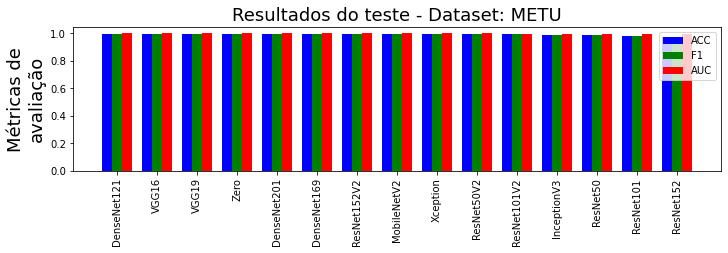

In [4]:
# Carrega as métricas de Treinamento
df_train_METU = []
f = open (os.path.join('Resultados', 'METU', 'Zero', 'TrainFinalMetrics.json'), "r")
data = json.loads(f.read())
f.close()
data['ModeloBase'] = 'Zero'
df_train_METU.append(data)
for model in lista_modelos:
    f = open (os.path.join('Resultados', 'METU', 'Transf', model, 'TrainFinalMetrics.json'), "r")
    data = json.loads(f.read())
    f.close()
    df_train_METU.append(data)
df_train_METU = pd.DataFrame.from_dict(df_train_METU)[['ModeloBase', 'Threshold', 'TN', 'FP', 'FN', 'TP', 'ACC', 'PR', 'RE', 'F1', 'AUC', 'Erro', 'TempoTreinamento']].sort_values(by = 'AUC', ascending = False).reset_index(drop = True)
print('Métricas de treinamento dos modelos com o dataset METU:')
display(df_train_METU)

plot_result(df_train_METU, 'Resultados da validação - Dataset: METU')


# Carrega as métricas de Teste
df_test_METU = []
f = open (os.path.join('Resultados', 'METU', 'Zero', 'TestFinalMetrics.json'), "r")
data = json.loads(f.read())
f.close()
data['ModeloBase'] = 'Zero'
df_test_METU.append(data)
for model in lista_modelos:
    f = open (os.path.join('Resultados', 'METU', 'Transf', model, 'TestFinalMetrics.json'), "r")
    data = json.loads(f.read())
    f.close()
    df_test_METU.append(data)
df_test_METU = pd.DataFrame.from_dict(df_test_METU)[['ModeloBase', 'Threshold', 'TN', 'FP', 'FN', 'TP', 'ACC', 'PR', 'RE', 'F1', 'AUC', 'Erro', 'TempoPredict']].sort_values(by = 'AUC', ascending = False).reset_index(drop = True)
print('Métricas de teste dos modelos com o dataset METU:')
display(df_test_METU)
plot_result(df_test_METU, 'Resultados do teste - Dataset: METU')


# Apresenta os resultados do modelo com o melhor resultado no teste (METU)

Curvas RE/PR/F1/ACC


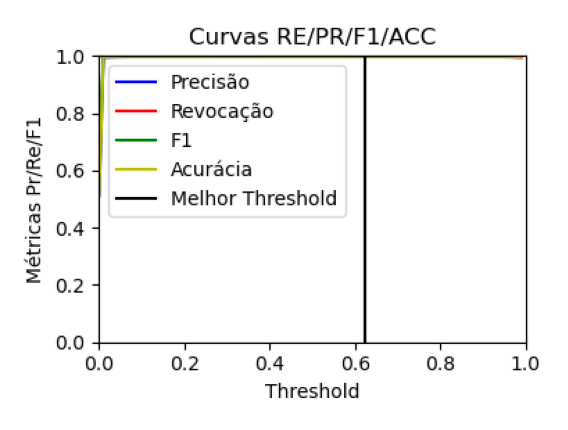

Curvas ROC/AUC


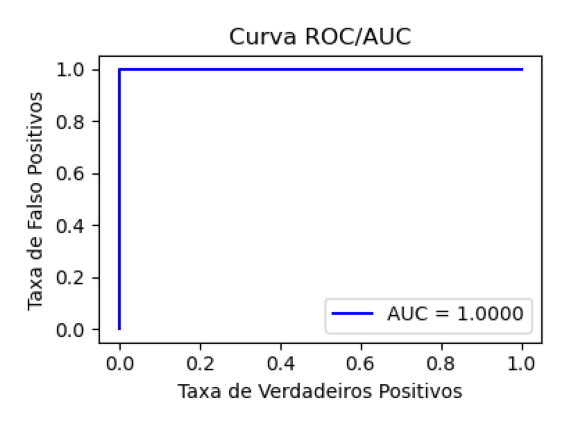

Histórico de treinamento


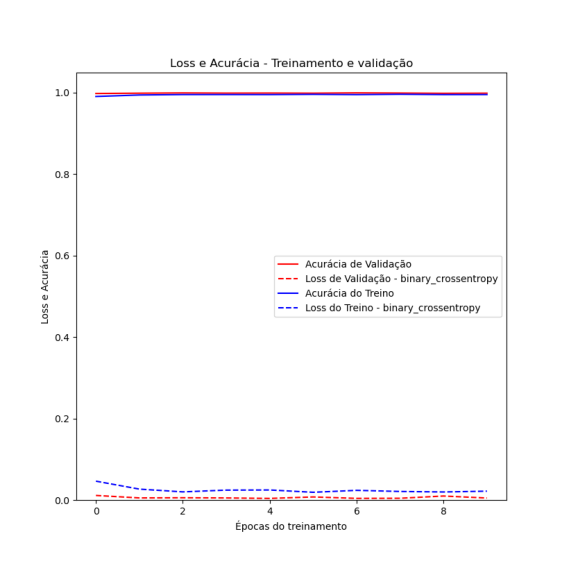

Amostra classificada Incorretamente


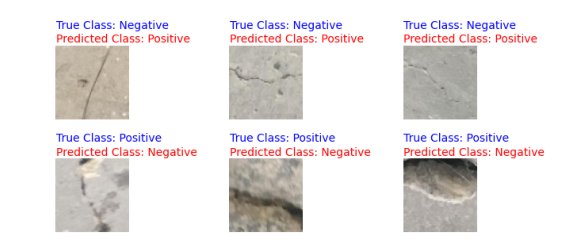

,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
7,MobileNetV2,0.624,3990,10,5,3995,0.998125,0.997503,0.99875,0.998126,0.999697,0.001875,18.293737


In [5]:
best_model = df_train_METU.loc[0, 'ModeloBase']

if best_model != 'Zero':
    # Plot Curvas RE/PR/F1/ACC
    MetricCurves = mpimg.imread(os.path.join('Resultados', 'METU', 'Transf', best_model, 'MetricCurves.png'))
    print('Curvas RE/PR/F1/ACC')
    plot_image(MetricCurves)
    
    # Plot Curva ROCAUC
    ROCAUC = mpimg.imread(os.path.join('Resultados', 'METU', 'Transf', best_model, 'ROCAUC.png'))
    print('Curvas ROC/AUC')
    plot_image(ROCAUC)
    
    # Plot Histórico de treinamento
    TrainHistory = mpimg.imread(os.path.join('Resultados', 'METU', 'Transf', best_model, 'TrainHistory.png'))
    print('Histórico de treinamento')
    plot_image(TrainHistory)
    
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'METU', 'Transf', best_model, 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_METU[df_test_METU['ModeloBase'] == best_model])

else:
    # Plot Curvas RE/PR/F1/ACC
    MetricCurves = mpimg.imread(os.path.join('Resultados', 'METU', best_model, 'MetricCurves.png'))
    print('Curvas RE/PR/F1/ACC')
    plot_image(MetricCurves)
    
    # Plot Curva ROCAUC
    ROCAUC = mpimg.imread(os.path.join('Resultados', 'METU', best_model, 'ROCAUC.png'))
    print('Curvas ROC/AUC')
    plot_image(ROCAUC)
    
    # Plot Histórico de treinamento
    TrainHistory = mpimg.imread(os.path.join('Resultados', 'METU', best_model, 'TrainHistory.png'))
    print('Histórico de treinamento')
    plot_image(TrainHistory)
    
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'METU', best_model, 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_METU[df_test_METU['ModeloBase'] == best_model])

# Carrega as métricas de treinamento e teste dos modelos com dataset SDNET

Métricas de treinamento dos modelos com o dataset SDNET:


,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoTreinamento
0,DenseNet169,0.654,7186,382,588,819,0.891922,0.681932,0.582090,0.628067,0.875508,0.108078,4922.823317
1,DenseNet121,0.653,7247,321,611,796,0.896156,0.712623,0.565743,0.630745,0.866365,0.103844,5381.432796
2,DenseNet201,0.540,7234,334,604,803,0.895487,0.706245,0.570718,0.631289,0.865351,0.104513,3670.544967
3,MobileNetV2,0.654,7181,387,678,729,0.881337,0.653226,0.518124,0.577883,0.832957,0.118663,1999.093613
4,Xception,0.496,7110,458,649,758,0.876657,0.623355,0.538735,0.577964,0.832563,0.123343,13902.366013
5,VGG16,0.568,7138,430,712,695,0.872758,0.617778,0.493959,0.548973,0.831310,0.127242,12929.914551
6,ResNet101V2,0.634,7156,412,673,734,0.879109,0.640489,0.521677,0.575010,0.830098,0.120891,5754.029656
7,ResNet50V2,0.574,6880,688,616,791,0.854708,0.534821,0.562189,0.548164,0.821664,0.145292,3436.436330
8,ResNet152V2,0.534,6822,746,625,782,0.847242,0.511780,0.555792,0.532879,0.813006,0.152758,8154.946477
9,VGG19,0.674,7231,337,851,556,0.867632,0.622620,0.395167,0.483478,0.786958,0.132368,13415.783415


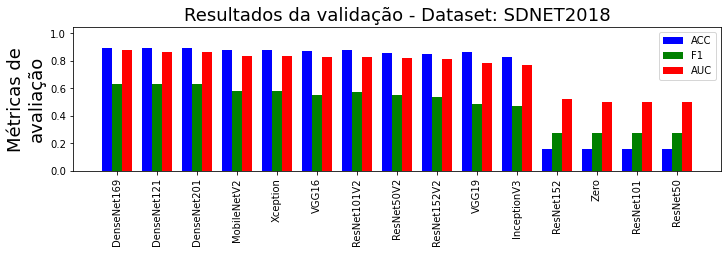

Métricas de teste dos modelos com o dataset SDNET:


,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
0,DenseNet121,0.653,9143,379,768,929,0.897763,0.710245,0.547437,0.618303,0.872375,0.102237,82.465983
1,DenseNet169,0.654,9020,502,749,948,0.888493,0.653793,0.558633,0.602479,0.870784,0.111507,100.484846
2,DenseNet201,0.540,9041,481,754,943,0.889919,0.662219,0.555687,0.604293,0.860188,0.110081,130.066496
3,MobileNetV2,0.654,9013,509,845,852,0.879312,0.626010,0.502062,0.557227,0.839889,0.120688,39.664544
4,VGG16,0.568,8986,536,873,824,0.874409,0.605882,0.485563,0.539091,0.838485,0.125591,227.008663
5,ResNet50V2,0.574,8704,818,743,954,0.860861,0.538375,0.562169,0.550014,0.827416,0.139139,70.672055
6,ResNet101V2,0.634,9004,518,843,854,0.878688,0.622449,0.503241,0.556533,0.822307,0.121312,135.042057
7,Xception,0.496,8953,569,805,892,0.877529,0.610541,0.525633,0.564915,0.819610,0.122471,148.877960
8,ResNet152V2,0.534,8639,883,752,945,0.854265,0.516958,0.556865,0.536170,0.819564,0.145735,200.457201
9,VGG19,0.674,9103,419,1054,643,0.868705,0.605461,0.378904,0.466111,0.792589,0.131295,283.190085


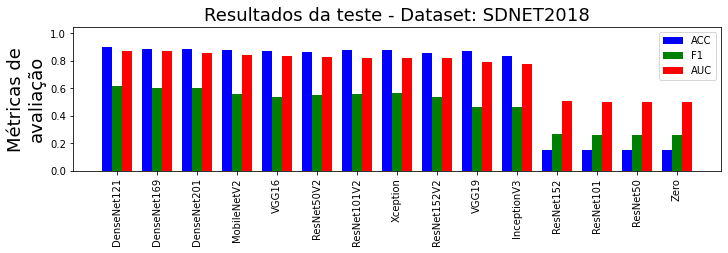

In [6]:
# Carrega as métricas de Treinamento
df_train_SDNET = []
f = open (os.path.join('Resultados', 'SDNET_2018', 'Zero', 'TrainFinalMetrics.json'), "r")
data = json.loads(f.read())
f.close()
data['ModeloBase'] = 'Zero'
df_train_SDNET.append(data)
for model in lista_modelos:
    f = open (os.path.join('Resultados', 'SDNET_2018', 'Transf', model, 'TrainFinalMetrics.json'), "r")
    data = json.loads(f.read())
    f.close()
    df_train_SDNET.append(data)
df_train_SDNET = pd.DataFrame.from_dict(df_train_SDNET)[['ModeloBase', 'Threshold', 'TN', 'FP', 'FN', 'TP', 'ACC', 'PR', 'RE', 'F1', 'AUC', 'Erro', 'TempoTreinamento']].sort_values(by = 'AUC', ascending = False).reset_index(drop = True)
print('Métricas de treinamento dos modelos com o dataset SDNET:')
display(df_train_SDNET)

plot_result(df_train_SDNET, 'Resultados da validação - Dataset: SDNET2018')

# Carrega as métricas de Teste
df_test_SDNET = []
f = open (os.path.join('Resultados', 'SDNET_2018', 'Zero', 'TestFinalMetrics.json'), "r")
data = json.loads(f.read())
f.close()
data['ModeloBase'] = 'Zero'
df_test_SDNET.append(data)
for model in lista_modelos:
    f = open (os.path.join('Resultados', 'SDNET_2018', 'Transf', model, 'TestFinalMetrics.json'), "r")
    data = json.loads(f.read())
    f.close()
    df_test_SDNET.append(data)
df_test_SDNET = pd.DataFrame.from_dict(df_test_SDNET)[['ModeloBase', 'Threshold', 'TN', 'FP', 'FN', 'TP', 'ACC', 'PR', 'RE', 'F1', 'AUC', 'Erro', 'TempoPredict']].sort_values(by = 'AUC', ascending = False).reset_index(drop = True)
print('Métricas de teste dos modelos com o dataset SDNET:')
display(df_test_SDNET)
plot_result(df_test_SDNET, 'Resultados da teste - Dataset: SDNET2018')

# Apresenta os resultados do modelo com o melhor resultado no teste (SDNET)

Curvas RE/PR/F1/ACC


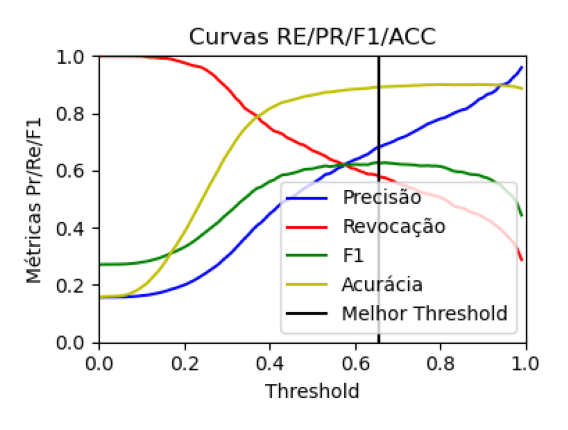

Curvas ROC/AUC


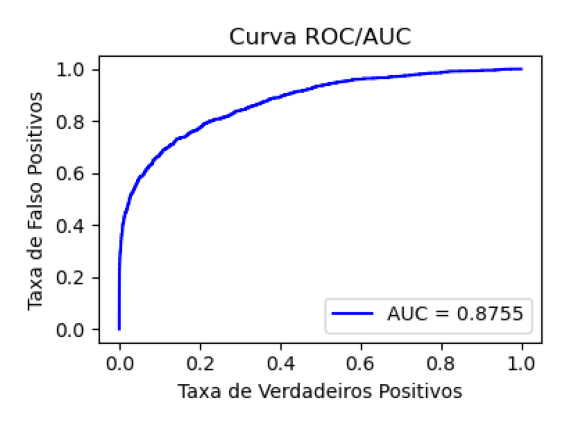

Histórico de treinamento


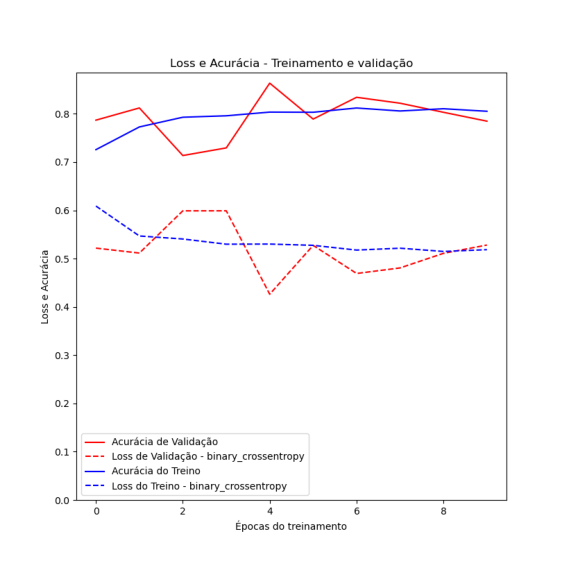

Amostra classificada Incorretamente


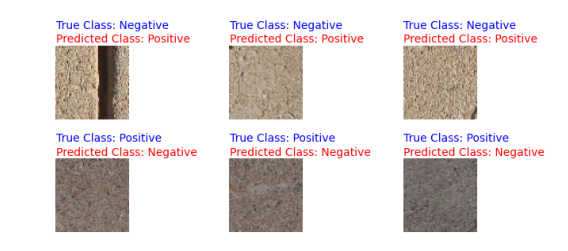

,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
1,DenseNet169,0.654,9020,502,749,948,0.888493,0.653793,0.558633,0.602479,0.870784,0.111507,100.484846


In [7]:
best_model = df_train_SDNET.loc[0, 'ModeloBase']

if best_model != 'Zero':
    # Plot Curvas RE/PR/F1/ACC
    MetricCurves = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', 'Transf', best_model, 'MetricCurves.png'))
    print('Curvas RE/PR/F1/ACC')
    plot_image(MetricCurves)
    
    # Plot Curva ROCAUC
    ROCAUC = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', 'Transf', best_model, 'ROCAUC.png'))
    print('Curvas ROC/AUC')
    plot_image(ROCAUC)
    
    # Plot Histórico de treinamento
    TrainHistory = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', 'Transf', best_model, 'TrainHistory.png'))
    print('Histórico de treinamento')
    plot_image(TrainHistory)
    
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', 'Transf', best_model, 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_SDNET[df_test_SDNET['ModeloBase'] == best_model])

else:
    # Plot Curvas RE/PR/F1/ACC
    MetricCurves = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', best_model, 'MetricCurves.png'))
    print('Curvas RE/PR/F1/ACC')
    plot_image(MetricCurves)
    
    # Plot Curva ROCAUC
    ROCAUC = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', best_model, 'ROCAUC.png'))
    print('Curvas ROC/AUC')
    plot_image(ROCAUC)
    
    # Plot Histórico de treinamento
    TrainHistory = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', best_model, 'TrainHistory.png'))
    print('Histórico de treinamento')
    plot_image(TrainHistory)
    
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'SDNET_2018', best_model, 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_SDNET[df_test_SDNET['ModeloBase'] == best_model])

# Carrega as métricas de treinamento e teste dos modelos com a validação cruzada

 - Treinamento: SDNET2018
 - Validação: METU

Métricas de teste dos modelos treinados com SDNET2018 e validados com METU:


,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
0,DenseNet169,0.654,3912,88,121,3879,0.973875,0.977817,0.96975,0.973767,0.995243,0.026125,57.172620
1,ResNet50V2,0.574,3886,114,88,3912,0.974750,0.971684,0.97800,0.974832,0.993600,0.025250,25.413090
2,ResNet152V2,0.534,3888,112,124,3876,0.970500,0.971916,0.96900,0.970456,0.992463,0.029500,47.175440
3,ResNet101V2,0.634,3935,65,192,3808,0.967875,0.983217,0.95200,0.967357,0.991943,0.032125,35.241803
4,VGG19,0.674,3953,47,326,3674,0.953375,0.987369,0.91850,0.951690,0.986984,0.046625,24.438611
5,DenseNet121,0.653,3913,87,302,3698,0.951375,0.977015,0.92450,0.950032,0.980704,0.048625,40.183547
6,InceptionV3,0.520,3883,117,404,3596,0.934875,0.968489,0.89900,0.932452,0.978069,0.065125,30.347862
7,VGG16,0.568,3917,83,298,3702,0.952375,0.978071,0.92550,0.951060,0.976216,0.047625,21.807638
8,DenseNet201,0.540,3912,88,637,3363,0.909375,0.974500,0.84075,0.902698,0.968955,0.090625,69.127535
9,Xception,0.496,3899,101,487,3513,0.926500,0.972053,0.87825,0.922774,0.942707,0.073500,21.956230


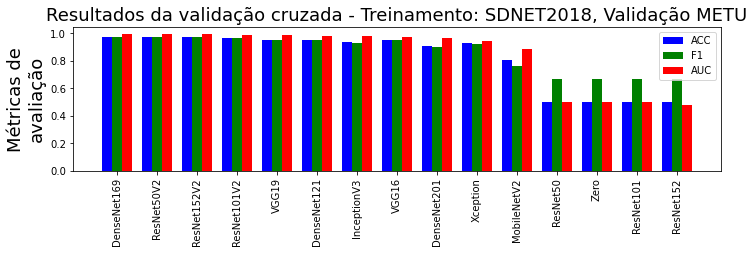

In [8]:
# Carrega as métricas de Teste
df_test_SDNET_METU = []
f = open (os.path.join('Resultados', 'CROSS_VALIDATION', 'Zero', 'train_SDNET_2018_test_METU', 'TestFinalMetrics.json'), "r")
data = json.loads(f.read())
f.close()
data['ModeloBase'] = 'Zero'
df_test_SDNET_METU.append(data)
for model in lista_modelos:
    f = open (os.path.join('Resultados', 'CROSS_VALIDATION', 'Transf', 'train_SDNET_2018_test_METU', model, 'TestFinalMetrics.json'), "r")
    data = json.loads(f.read())
    f.close()
    df_test_SDNET_METU.append(data)
df_test_SDNET_METU = pd.DataFrame.from_dict(df_test_SDNET_METU)[['ModeloBase', 'Threshold', 'TN', 'FP', 'FN', 'TP', 'ACC', 'PR', 'RE', 'F1', 'AUC', 'Erro', 'TempoPredict']].sort_values(by = 'AUC', ascending = False).reset_index(drop = True)
print('Métricas de teste dos modelos treinados com SDNET2018 e validados com METU:')
display(df_test_SDNET_METU)

plot_result(df_test_SDNET_METU, 'Resultados da validação cruzada - Treinamento: SDNET2018, Validação METU')

Amostra classificada Incorretamente


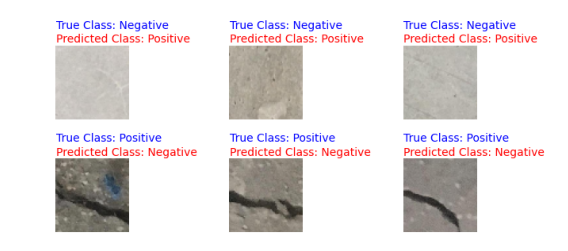

,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
0,DenseNet169,0.654,3912,88,121,3879,0.973875,0.977817,0.96975,0.973767,0.995243,0.026125,57.17262


In [9]:
best_model = df_test_SDNET_METU.loc[0, 'ModeloBase']

if best_model != 'Zero':
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'CROSS_VALIDATION', 'Transf', 'train_SDNET_2018_test_METU', model, 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_SDNET_METU[df_test_SDNET_METU['ModeloBase'] == best_model])

else:
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'CROSS_VALIDATION', 'Zero', 'train_SDNET_2018_test_METU', 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_SDNET_METU[df_test_SDNET_METU['ModeloBase'] == best_model])
    


# Carrega as métricas de treinamento e teste dos modelos com a validação cruzada

 - Treinamento: METU
 - Validação: SDNET2018

Métricas de teste dos modelos treinados com METU e validados com SDNET2018:


,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
0,DenseNet169,0.326,8869,653,1061,636,0.847223,0.493406,0.374779,0.425988,0.753610,0.152777,113.869285
1,ResNet101V2,0.746,9010,512,1135,562,0.853195,0.523277,0.331173,0.405630,0.751730,0.146805,60.338067
2,DenseNet121,0.631,9031,491,1127,570,0.855780,0.537229,0.335887,0.413343,0.740671,0.144220,84.554648
3,DenseNet201,0.590,9084,438,1131,566,0.860148,0.563745,0.333530,0.419104,0.738665,0.139852,138.359257
4,VGG19,0.732,8873,649,1234,463,0.832160,0.416367,0.272834,0.329655,0.724420,0.167840,40.208100
5,ResNet152V2,0.262,8904,618,1164,533,0.841162,0.463076,0.314084,0.374298,0.722873,0.158838,71.408871
6,Xception,0.656,9092,430,1242,455,0.850967,0.514124,0.268120,0.352440,0.714810,0.149033,38.556615
7,ResNet50V2,0.823,9160,362,1247,450,0.856583,0.554187,0.265174,0.358709,0.698080,0.143417,50.213673
8,MobileNetV2,0.624,8532,990,1067,630,0.816650,0.388889,0.371243,0.379861,0.692539,0.183350,28.559791
9,InceptionV3,0.523,8831,691,1216,481,0.830021,0.410410,0.283441,0.335308,0.650969,0.169979,58.650187


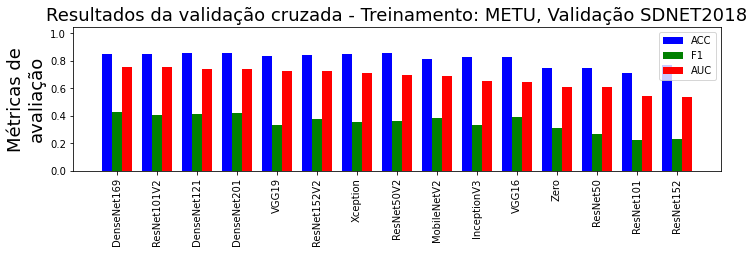

In [10]:
# Carrega as métricas de Teste
df_test_METU_SDNET = []
f = open (os.path.join('Resultados', 'CROSS_VALIDATION', 'Zero', 'train_METU_test_SDNET_2018', 'TestFinalMetrics.json'), "r")
data = json.loads(f.read())
f.close()
data['ModeloBase'] = 'Zero'
df_test_METU_SDNET.append(data)
for model in lista_modelos:
    f = open (os.path.join('Resultados', 'CROSS_VALIDATION', 'Transf', 'train_METU_test_SDNET_2018', model, 'TestFinalMetrics.json'), "r")
    data = json.loads(f.read())
    f.close()
    df_test_METU_SDNET.append(data)
df_test_METU_SDNET = pd.DataFrame.from_dict(df_test_METU_SDNET)[['ModeloBase', 'Threshold', 'TN', 'FP', 'FN', 'TP', 'ACC', 'PR', 'RE', 'F1', 'AUC', 'Erro', 'TempoPredict']].sort_values(by = 'AUC', ascending = False).reset_index(drop = True)
print('Métricas de teste dos modelos treinados com METU e validados com SDNET2018:')
display(df_test_METU_SDNET)

plot_result(df_test_METU_SDNET, 'Resultados da validação cruzada - Treinamento: METU, Validação SDNET2018')

Amostra classificada Incorretamente


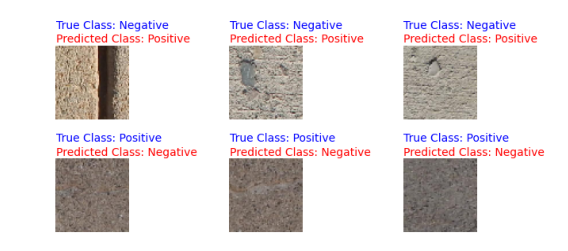

,ModeloBase,Threshold,TN,FP,FN,TP,ACC,PR,RE,F1,AUC,Erro,TempoPredict
0,DenseNet169,0.326,8869,653,1061,636,0.847223,0.493406,0.374779,0.425988,0.75361,0.152777,113.869285


In [11]:
best_model = df_test_METU_SDNET.loc[0, 'ModeloBase']

if best_model != 'Zero':
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'CROSS_VALIDATION', 'Transf', 'train_METU_test_SDNET_2018', model, 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_METU_SDNET[df_test_METU_SDNET['ModeloBase'] == best_model])

else:
    # Plot Amostra classificada Incorretamente
    Resultado = mpimg.imread(os.path.join('Resultados', 'CROSS_VALIDATION', 'Zero', 'train_METU_test_SDNET_2018', 'Resultado.png'))
    print('Amostra classificada Incorretamente')
    plot_image(Resultado)
    
    # Apresenta o resultado do teste
    display(df_test_METU_SDNET[df_test_METU_SDNET['ModeloBase'] == best_model])